# Verify the difference in accuracy by parameters

* Model
* Seed
* Ensemble
* Recycle

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)
from scipy import stats

In [2]:
data_dir = Path('../../../../../data/')
dataset_dir = data_dir / 'out' / 'dataset'
subset_name = 'target_subset_' + Path('.').resolve().parent.name
score_dir = dataset_dir / 'score' / 'subsets' / subset_name
assert score_dir.exists()
fig_dir = score_dir / 'fig' / 'accuracy'
fig_dir.mkdir(parents=True, exist_ok=True)
target_list = data_dir / 'interim' / f'{subset_name}.csv'
assert target_list.exists()

In [3]:
label_path = score_dir / 'label.csv'
label_df = pd.read_csv(label_path, index_col=0)
target_df = pd.read_csv(target_list, index_col=0)
df = pd.merge(label_df, target_df, left_on='Target', right_on='id', how='left')
df

Model  TMscore  GDT_TS  GDT_HA  Global_LDDT  \
0       model_1_ptm_seed_0_rec_10_ens_1    0.981   0.980   0.919        0.910   
1       model_1_ptm_seed_0_rec_10_ens_8    0.981   0.979   0.916        0.910   
2        model_1_ptm_seed_0_rec_1_ens_1    0.981   0.980   0.917        0.909   
3        model_1_ptm_seed_0_rec_1_ens_8    0.980   0.979   0.917        0.910   
4        model_1_ptm_seed_0_rec_2_ens_1    0.981   0.979   0.919        0.911   
...                                 ...      ...     ...     ...          ...   
187595       model_5_seed_1_rec_5_ens_1    0.987   0.971   0.873          NaN   
187596       model_5_seed_1_rec_6_ens_1    0.987   0.971   0.874          NaN   
187597       model_5_seed_1_rec_7_ens_1    0.987   0.971   0.874          NaN   
187598       model_5_seed_1_rec_8_ens_1    0.987   0.970   0.874          NaN   
187599       model_5_seed_1_rec_9_ens_1    0.987   0.971   0.874          NaN   

        Mean_LDDT  pLDDT  pTMscore  Tolerance    ModelName  ...  Length  \
0           0.901  0.955     0.900      0.032  model_1_ptm  ...     158   
1           0.901  0.956     0.901      0.019  model_1_ptm  ...     158   
2           0.901  0.944     0.895     20.749  model_1_ptm  ...     158   
3           0.901  0.947     0.896     20.749  model_1_ptm  ...     158   
4           0.903  0.948     0.897      0.172  model_1_ptm  ...     158   
...           ...    ...       ...        ...          ...  ...     ...   
187595        NaN  0.964       NaN      0.054      model_5  ...     462   
187596        NaN  0.964       NaN      0.045      model_5  ...     462   
187597        NaN  0.963       NaN      0.044      model_5  ...     462   
187598        NaN  0.964       NaN      0.056      model_5  ...     462   
187599        NaN  0.963       NaN      0.061      model_5  ...     462   

            id  resolution           releasedate  \
0       6AN4_A       1.470  2019-04-17T00:00:00Z   
1       6AN4_A       1.470  2019-04-17T00:00:00Z   
2       6AN4_A       1.470  2019-04-17T00:00:00Z   
3       6AN4_A       1.470  2019-04-17T00:00:00Z   
4       6AN4_A       1.470  2019-04-17T00:00:00Z   
...        ...         ...                   ...   
187595  6R6U_A       1.710  2018-08-08T00:00:00Z   
187596  6R6U_A       1.710  2018-08-08T00:00:00Z   
187597  6R6U_A       1.710  2018-08-08T00:00:00Z   
187598  6R6U_A       1.710  2018-08-08T00:00:00Z   
187599  6R6U_A       1.710  2018-08-08T00:00:00Z   

                                                   header  \
0       >6an4_A mol:protein length:158  2-amino-4-hydr...   
1       >6an4_A mol:protein length:158  2-amino-4-hydr...   
2       >6an4_A mol:protein length:158  2-amino-4-hydr...   
3       >6an4_A mol:protein length:158  2-amino-4-hydr...   
4       >6an4_A mol:protein length:158  2-amino-4-hydr...   
...                                                   ...   
187595  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187596  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187597  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187598  >6r6u_A mol:protein length:462  Cis-aconitate ...   
187599  >6r6u_A mol:protein length:462  Cis-aconitate ...   

                                                 sequence  length  \
0       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
1       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
2       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
3       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
4       TVAYIAIGSNLASPLEQVNAALKALGDIPESHILTVSSFYRTPPLG...     158   
...                                                   ...     ...   
187595  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187596  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187597  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187598  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMILDTLGAGFLGT...     462   
187599  GGGRKSITESFATAIHGLKVGHLTDRVIQRSKRMI

## Difference between models

In [4]:
df.columns

Index(['Model', 'TMscore', 'GDT_TS', 'GDT_HA', 'Global_LDDT', 'Mean_LDDT',
       'pLDDT', 'pTMscore', 'Tolerance', 'ModelName', 'Seed', 'Recycle',
       'Ensemble', 'Target', 'Num_diff', 'Num_missing', 'Length', 'id',
       'resolution', 'releasedate', 'header', 'sequence', 'length',
       'num_entry_in_cluster', 'num_entry_in_cluster_AF2_notInclude',
       'is_similar_AF2'],
      dtype='object')

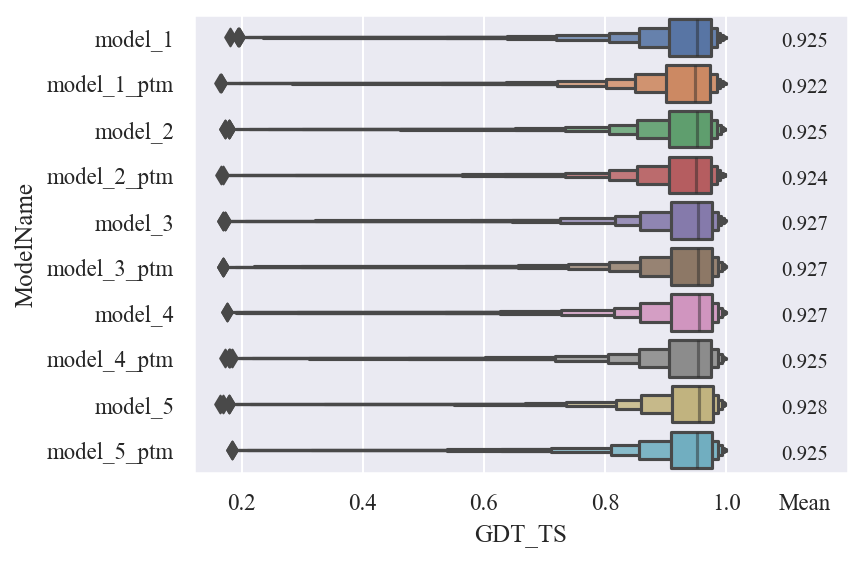

In [5]:
label = 'GDT_TS'
model_names = []
for i in range(10):
    model_name = f'model_{i // 2 + 1}'
    if i % 2 == 1:
        model_name += '_ptm'
    model_names.append(model_name)
sns.boxenplot(data=df.sort_values('ModelName'), x=label, y='ModelName', order=model_names)
xticks_max = 1.13
plt.xlim(None, 1.2)
xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
xticks_str = list(map(lambda x: str(x)[:3], xticks))
xticks_str[-1] = 'Mean'
plt.xticks(xticks, xticks_str)
plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
mean_series = df.groupby('ModelName').mean()['GDT_TS']
for i, model_name in enumerate(model_names):
    value = mean_series[model_name]
    plt.text(xticks_max, i + 0.2, f'{value:.3f}', size=10, horizontalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / f'boxen_{label}_modelname.png')

## Difference between seeds

In [6]:
seed_0_df = df.query('Seed == 0')
seed_1_df = df.query('Seed == 1')
seed_df = pd.merge(seed_0_df, seed_1_df, on=['ModelName', 'Ensemble', 'Recycle', 'Target'], suffixes=('_seed_0', '_seed_1'))

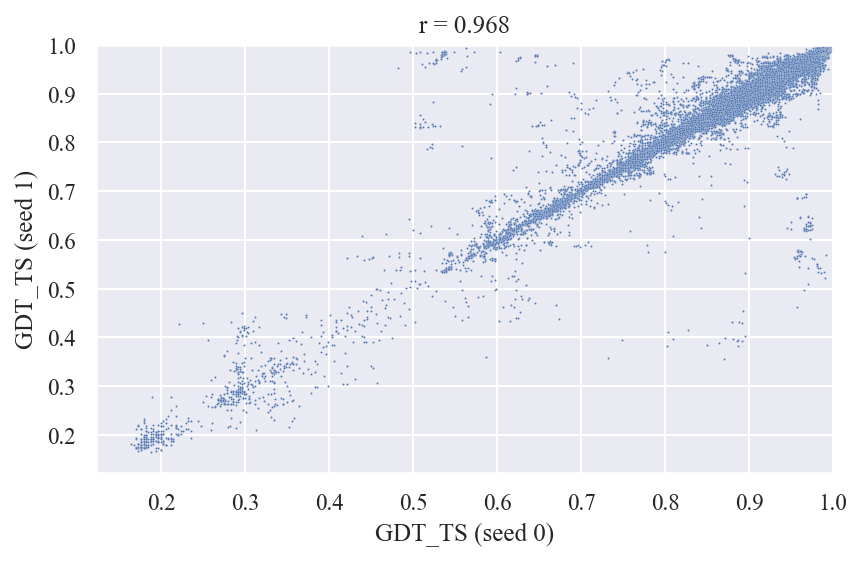

In [7]:
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=seed_df, x=f'{label}_seed_0', y=f'{label}_seed_1', s=1)
plt.xlabel(f'{label} (seed 0)')
plt.ylabel(f'{label} (seed 1)')
cc = seed_df.corr()[f'{label}_seed_0'][f'{label}_seed_1']
plt.title(f'r = {cc:.3f}')
plt.xlim(None, 1)
plt.ylim(None, 1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_seed.png')

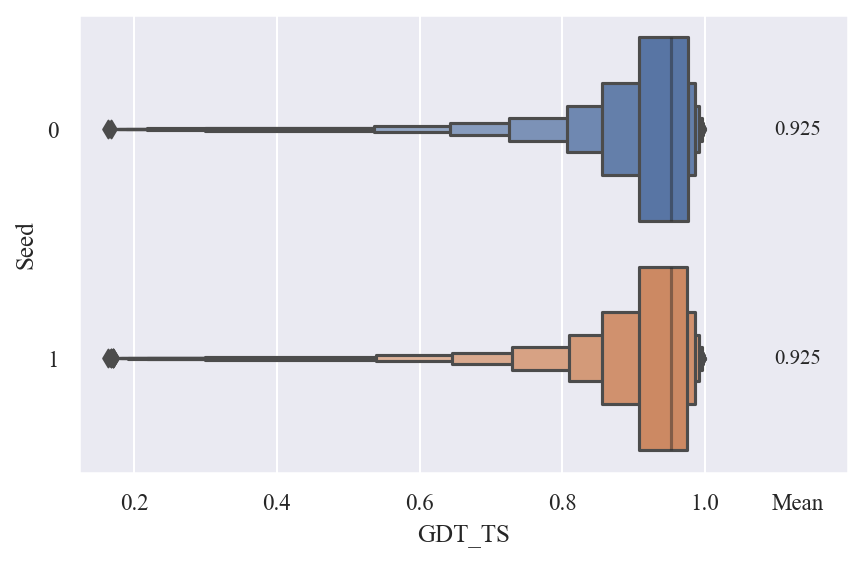

In [8]:
label = 'GDT_TS'
df['Seed'] = df['Seed'].astype(str)
sns.boxenplot(data=df, x=label, y='Seed')
df['Seed'] = df['Seed'].astype(int)
xticks_max = 1.13
plt.xlim(None, 1.2)
xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
xticks_str = list(map(lambda x: str(x)[:3], xticks))
xticks_str[-1] = 'Mean'
plt.xticks(xticks, xticks_str)
plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
mean_series = df.groupby('Seed').mean()['GDT_TS']
for i, seed in enumerate([0, 1]):
    value = mean_series[seed]
    plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / f'boxen_{label}_seed.png')

In [9]:
# Wilcoxon signed-rank test between two seeeds
data = seed_df
x = f'{label}_seed_0'
y = f'{label}_seed_1'
print(data[x].mean(), data[y].mean())
print(stats.wilcoxon(data[x], data[y]))

0.9252876012793179 0.9254745309168443
WilcoxonResult(statistic=1060514229.5, pvalue=0.015549195919038342)



## Difference between with and without ensemble

In [10]:
df['Ensemble'] = [True if e == 8 else False for e in df['Ensemble']]
en_df = df.query('Ensemble == True')
no_en_df = df.query('Ensemble == False')
en_merge_df = pd.merge(en_df, no_en_df, on=['ModelName', 'Seed', 'Recycle', 'Target'], suffixes=('_en', '_no_en'))

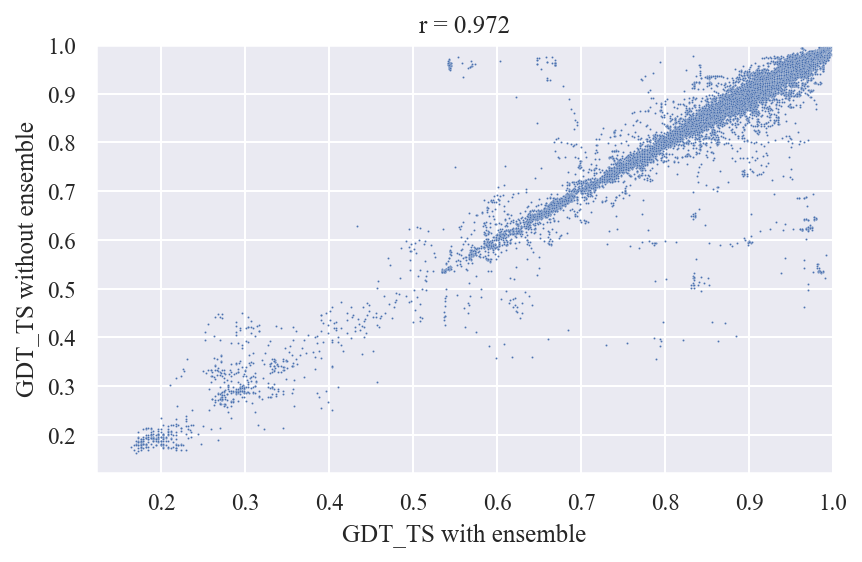

In [11]:
# Scatterplot of GDT_TS of models with and without ensemble
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=en_merge_df, x=f'{label}_en', y=f'{label}_no_en', s=1)
plt.xlabel(f'{label} with ensemble')
plt.ylabel(f'{label} without ensemble')
cc = en_merge_df.corr()[f'{label}_en'][f'{label}_no_en']
plt.title(f'r = {cc:.3f}')
plt.xlim(None, 1)
plt.ylim(None, 1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_en_or_no_en.png')

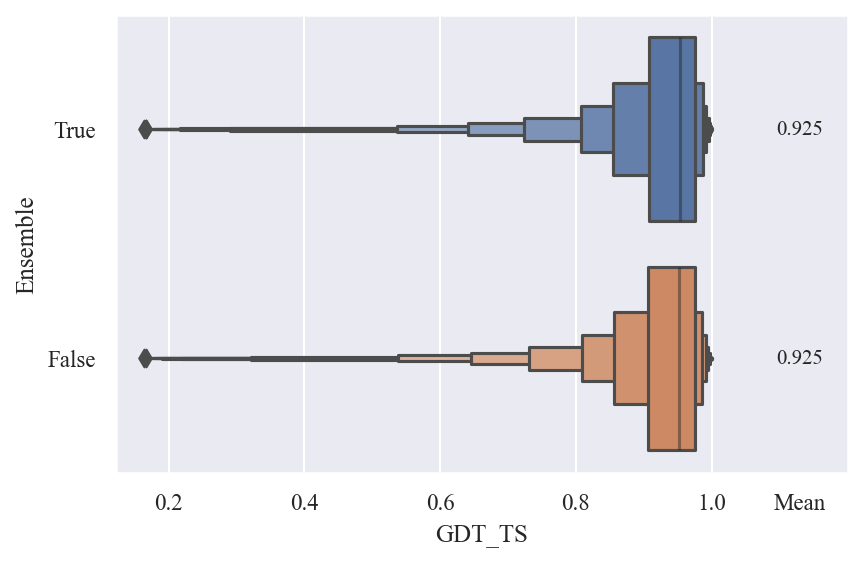

In [12]:
label = 'GDT_TS'
y = 'Ensemble'
df[y] = df[y].astype(str)
sns.boxenplot(data=df, x=label, y=y, order=['True', 'False'])
xticks_max = 1.13
plt.xlim(None, 1.2)
xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
xticks_str = list(map(lambda x: str(x)[:3], xticks))
xticks_str[-1] = 'Mean'
plt.xticks(xticks, xticks_str)
plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
mean_series = df.groupby(y).mean()['GDT_TS']
for i, ens in enumerate(['True', 'False']):
    value = mean_series[ens]
    plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / f'boxen_{label}_ensemble.png')

In [13]:
# Wilcoxon signed-rank test between two seeeds
data = en_merge_df
x = f'{label}_en'
y = f'{label}_no_en'
print(data[x].mean(), data[y].mean())
print(stats.wilcoxon(data[x], data[y]))

0.9254220445205481 0.9246300730593607
WilcoxonResult(statistic=878364712.0, pvalue=2.8561495005409863e-120)


## Difference between recycles

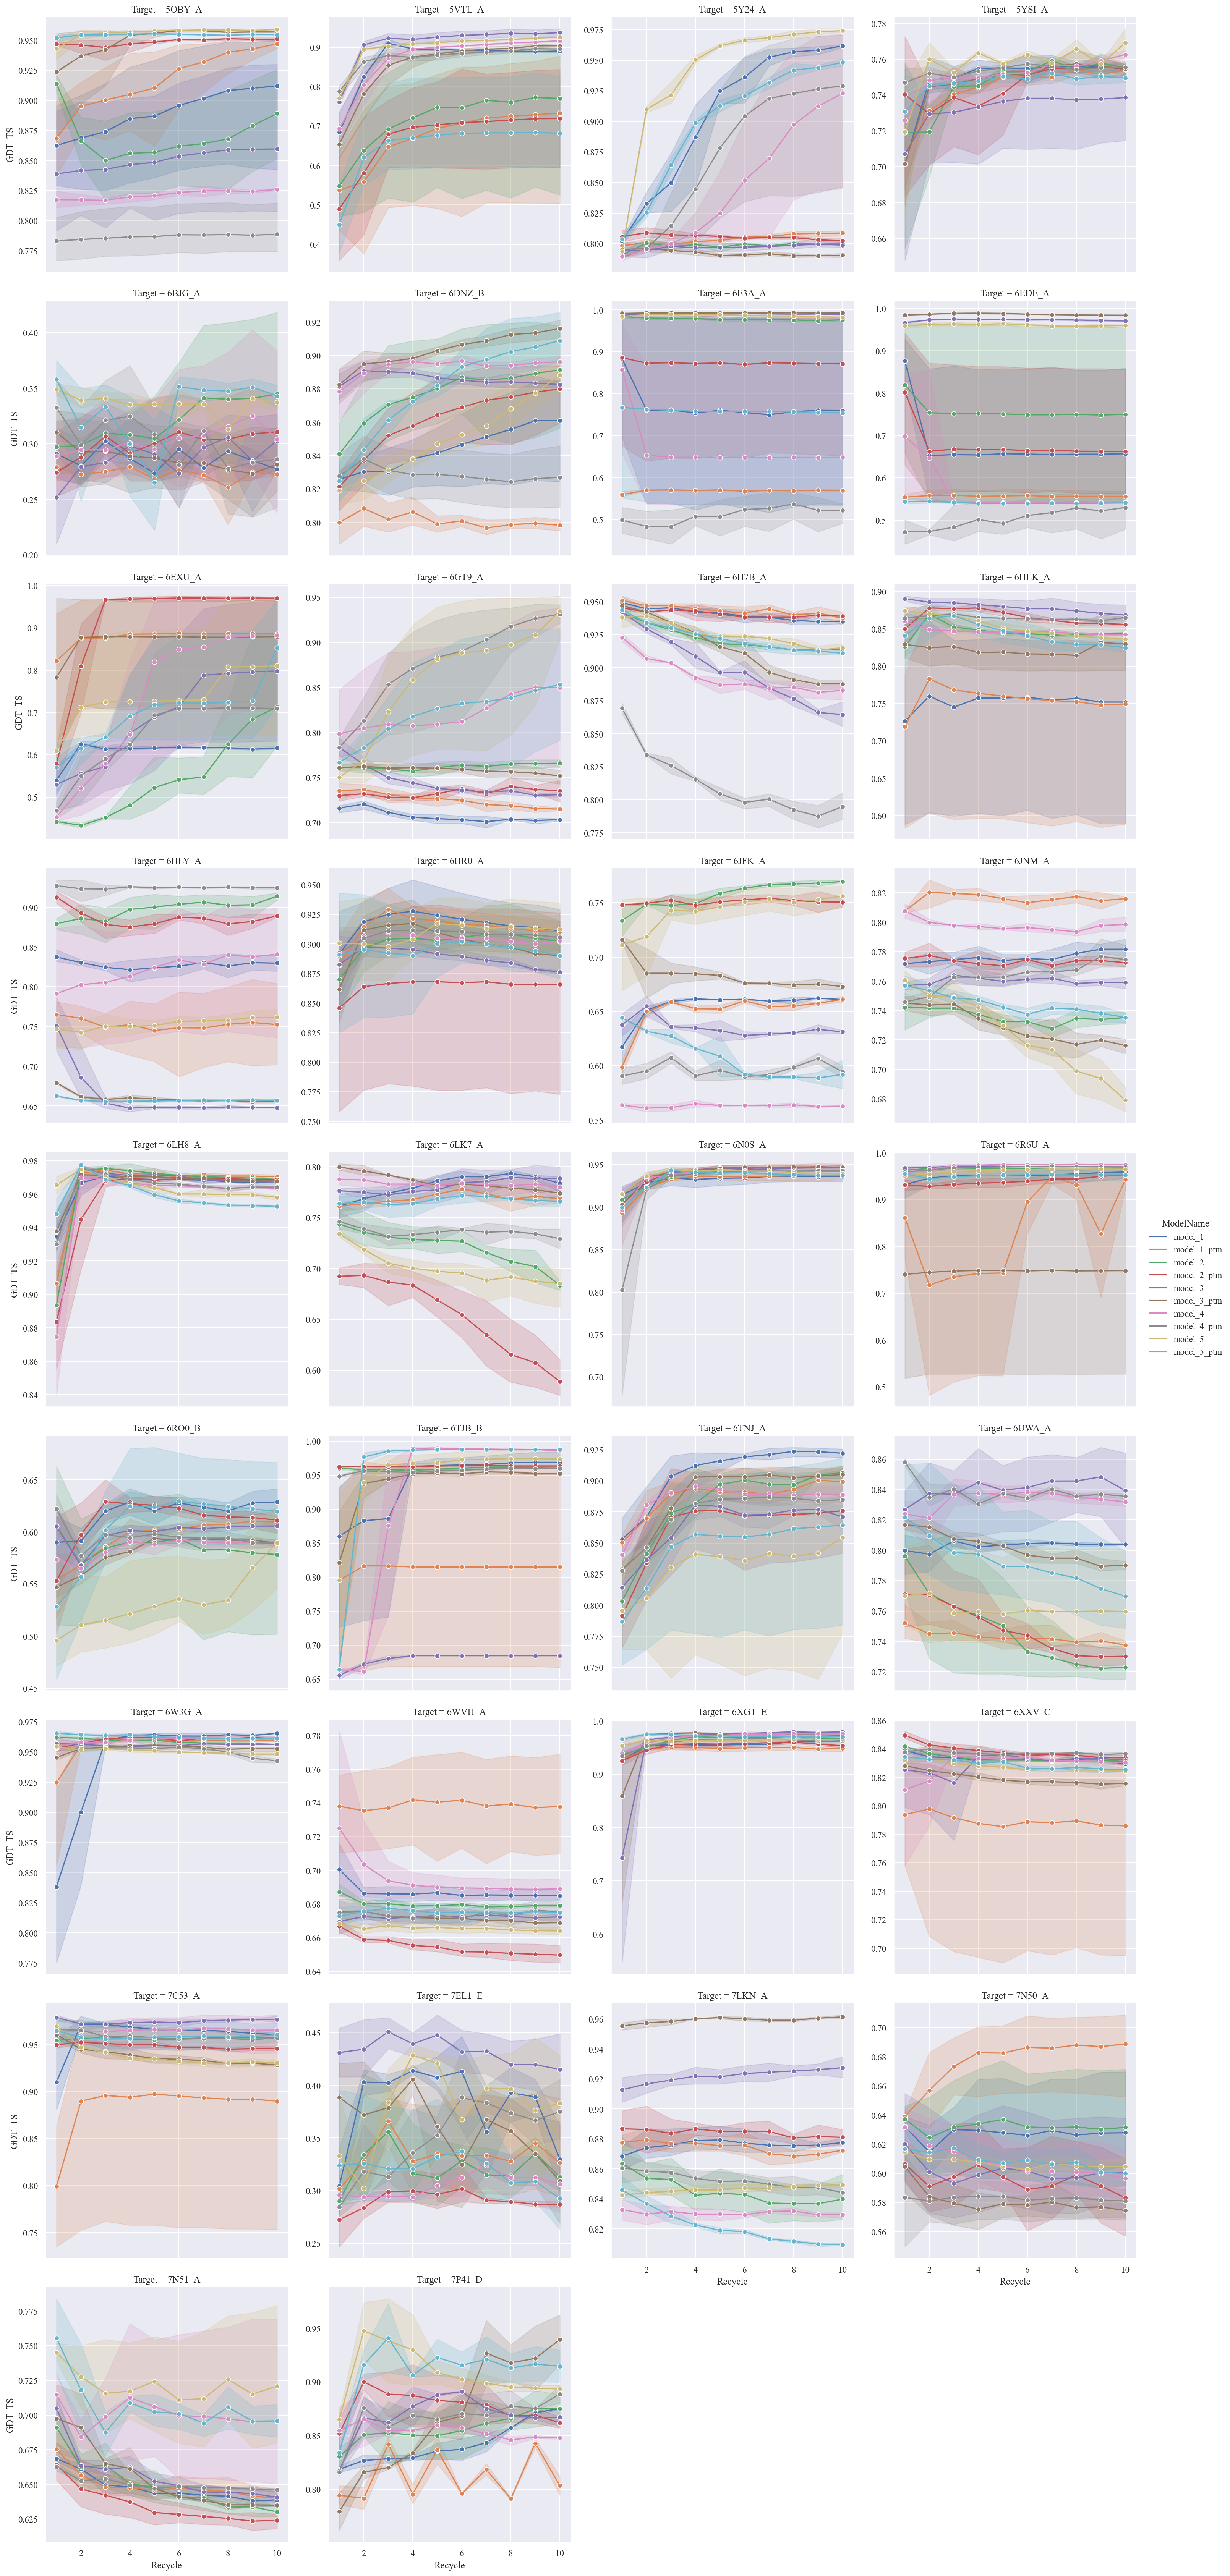

In [14]:
label = 'GDT_TS'
threshold = 0.15
# For targets whose value difference between max and min is larger than threshold
data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o',
            col='Target', col_wrap=4, facet_kws={'sharey': False, 'sharex': True})

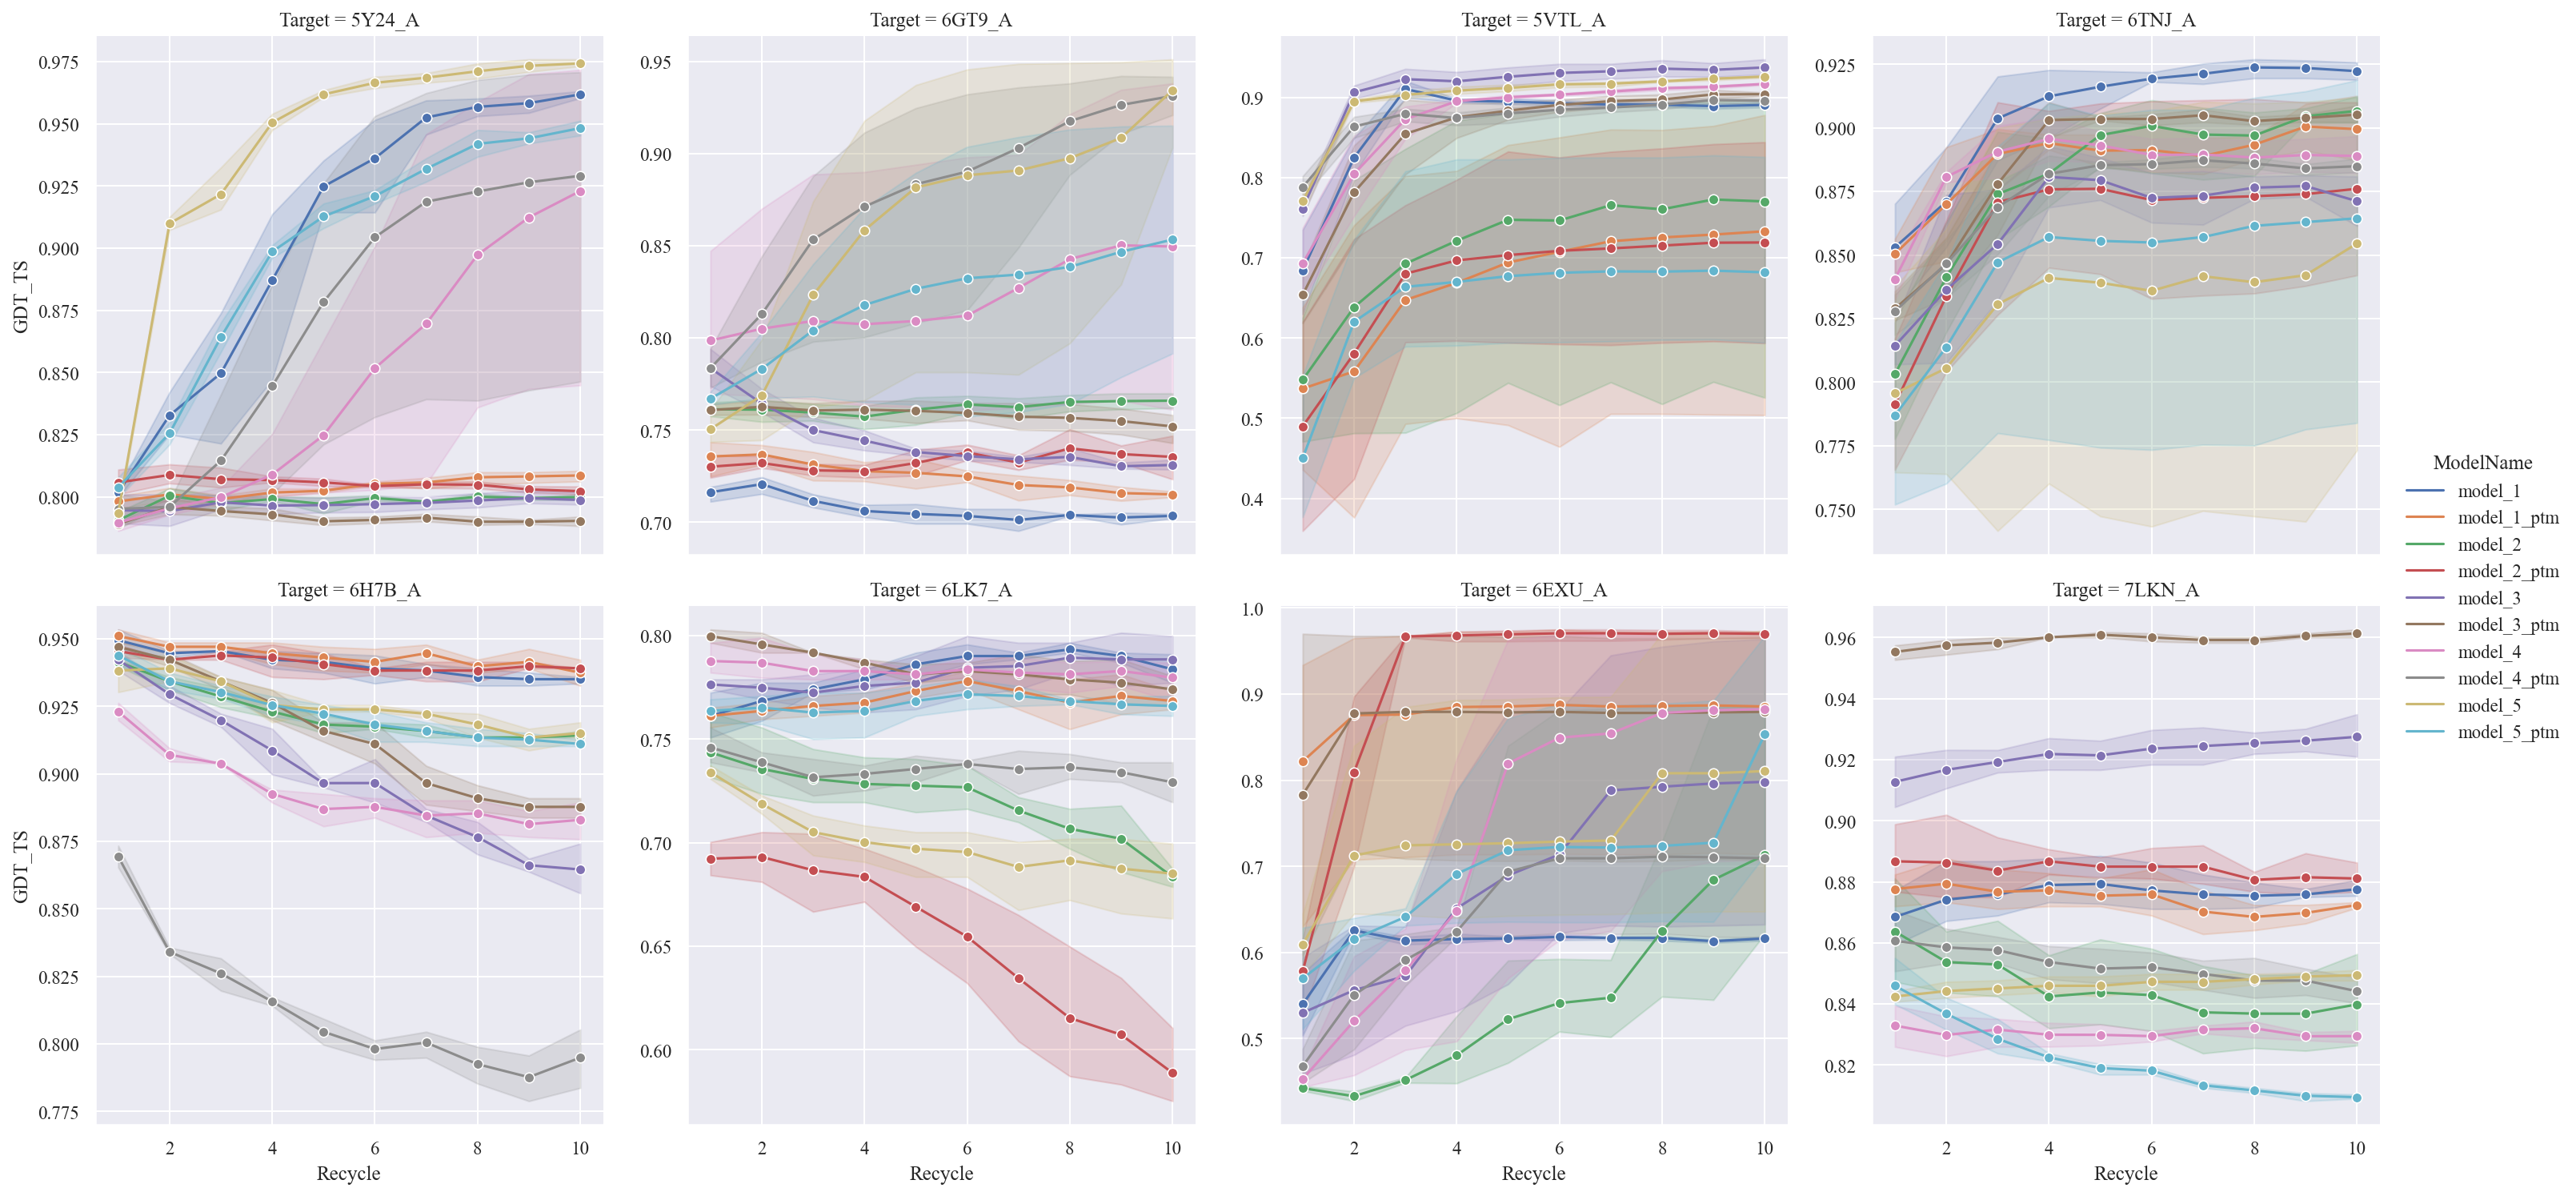

In [15]:
# Sample targets
label = 'GDT_TS'
sample_targets = ['5Y24_A', '6GT9_A', '5VTL_A', '6TNJ_A', '6H7B_A', '6LK7_A', '6EXU_A', '7LKN_A']
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o', col_order=sample_targets,
            col='Target', col_wrap=4, facet_kws={'sharey': False, 'sharex': True})
plt.savefig(fig_dir / f'lineplot_{label}_sample_8targets.png')

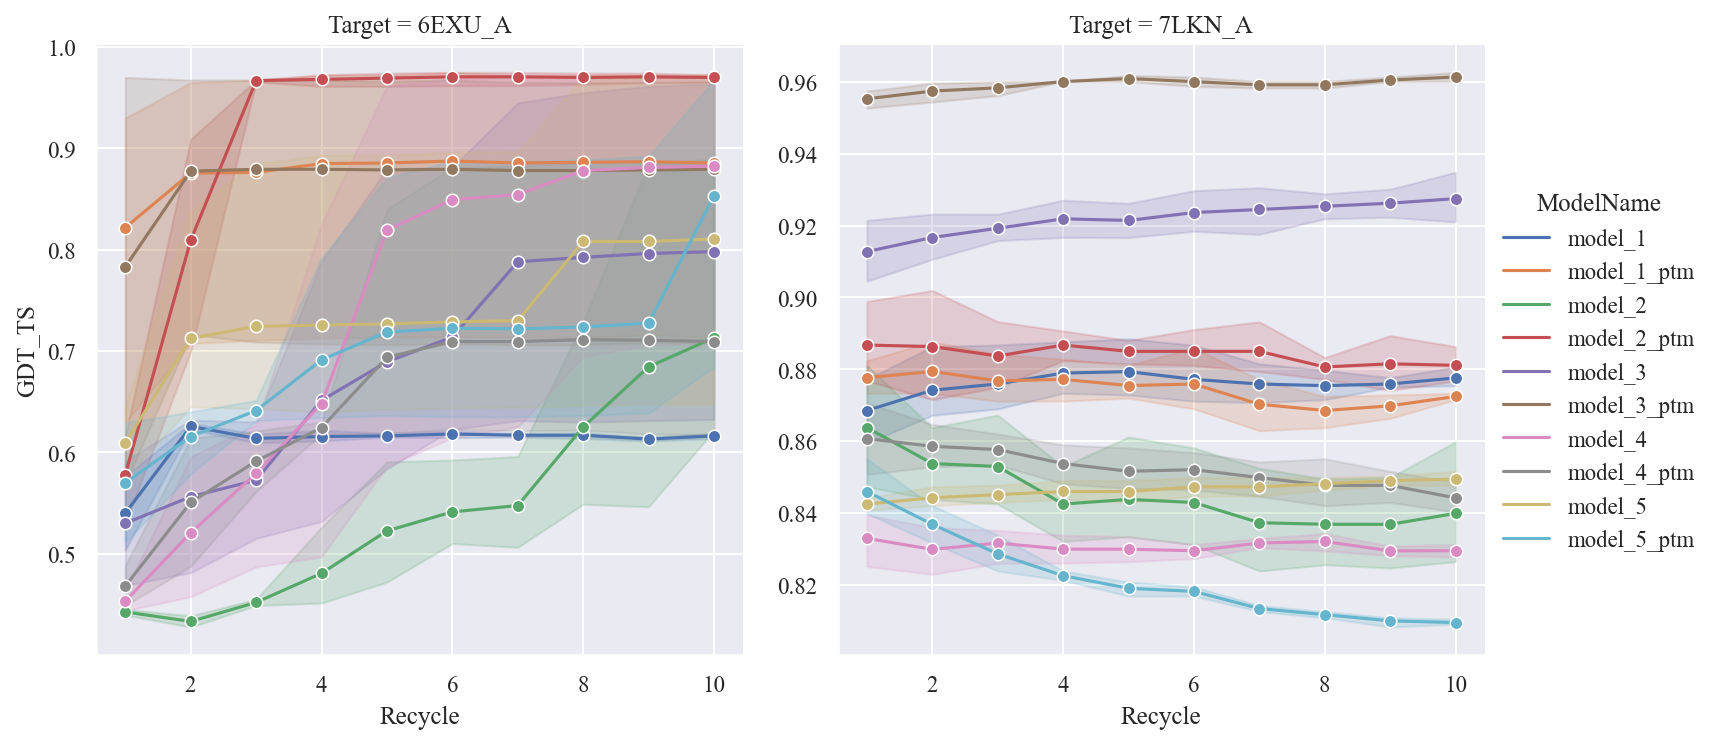

In [16]:
# Cases where there is a large difference in accuracy between models
label = 'GDT_TS'
sample_targets = ['6EXU_A', '7LKN_A']
data = df.query('Target in @sample_targets')
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o', col_order=sample_targets,
            col='Target', col_wrap=len(sample_targets), facet_kws={'sharey': False, 'sharex': True})

In [ ]:
label = 'GDT_TS'
threshold = 0.1
# For targets whose value difference between max and min is larger than threshold
data = df.groupby('Target').filter(lambda x: x[label].max() - x[label].min() > threshold)
sns.relplot(data=data.sort_values(['Target', 'ModelName']), x='Recycle', y='GDT_TS',
            hue='ModelName', kind='line', markers=True, dashes=True, marker='o',
            col='Target', col_wrap=7, facet_kws={'sharey': False, 'sharex': True})

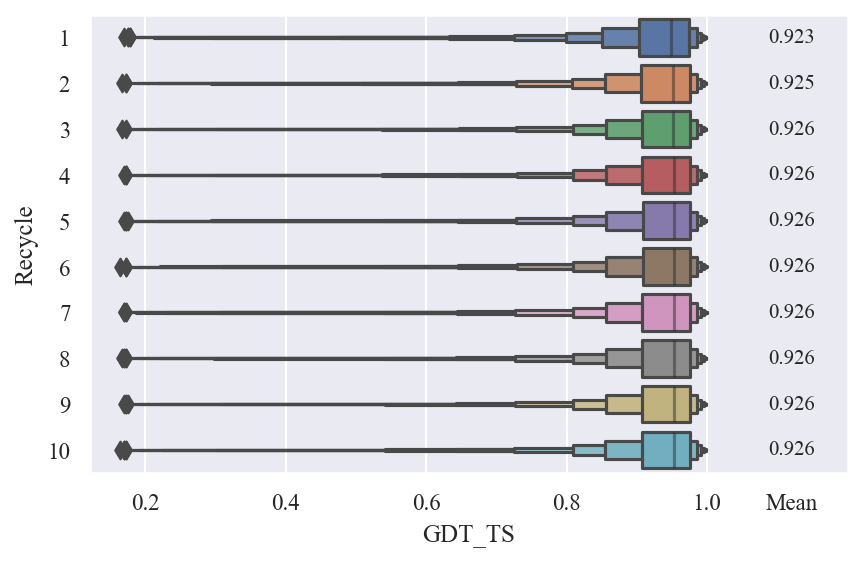

In [18]:
label = 'GDT_TS'
y = 'Recycle'
df[y] = df[y].astype(str)
sns.boxenplot(data=df, x=label, y=y, order=map(str, range(1, 11)))
df[y] = df[y].astype(int)
xticks_max = 1.12
plt.xlim(None, 1.2)
xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
xticks_str = list(map(lambda x: str(x)[:3], xticks))
xticks_str[-1] = 'Mean'
plt.xticks(xticks, xticks_str)
plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
mean_series = df.groupby(y).mean()['GDT_TS']
for i, rec in enumerate(df[y].sort_values().unique()):
    value = mean_series[rec]
    plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / f'boxen_{label}_recycle.png')

In [19]:
df.groupby('Recycle').mean()[label]

Recycle
1    0.923
2    0.925
3    0.926
4    0.926
5    0.926
6    0.926
7    0.926
8    0.926
9    0.926
10   0.926
Name: GDT_TS, dtype: float64

## Difference between model_n and model_n_ptm

In [20]:
df['model_num'] = [m.split('_')[1] for m in df['ModelName']]
df['ptm'] = [True if m.endswith('_ptm') else False for m in df['ModelName']]
normal_df = df.query('ptm == False')
ptm_df = df.query('ptm == True')
model_df = pd.merge(normal_df, ptm_df, on=['model_num', 'Seed', 'Ensemble', 'Recycle', 'Target'], suffixes=('_normal', '_ptm'))
model_df

Model_normal  TMscore_normal  GDT_TS_normal  \
0      model_1_seed_0_rec_10_ens_1           0.981          0.979   
1      model_1_seed_0_rec_10_ens_8           0.981          0.977   
2       model_1_seed_0_rec_1_ens_1           0.980          0.979   
3       model_1_seed_0_rec_1_ens_8           0.980          0.977   
4       model_1_seed_0_rec_2_ens_1           0.980          0.977   
...                            ...             ...            ...   
93795   model_5_seed_1_rec_5_ens_1           0.987          0.971   
93796   model_5_seed_1_rec_6_ens_1           0.987          0.971   
93797   model_5_seed_1_rec_7_ens_1           0.987          0.971   
93798   model_5_seed_1_rec_8_ens_1           0.987          0.970   
93799   model_5_seed_1_rec_9_ens_1           0.987          0.971   

       GDT_HA_normal  Global_LDDT_normal  Mean_LDDT_normal  pLDDT_normal  \
0              0.919               0.910             0.902         0.960   
1              0.920               0.908             0.900         0.960   
2              0.917               0.907             0.899         0.952   
3              0.916               0.908             0.899         0.953   
4              0.917               0.908             0.900         0.956   
...              ...                 ...               ...           ...   
93795          0.873                 NaN               NaN         0.964   
93796          0.874                 NaN               NaN         0.964   
93797          0.874                 NaN               NaN         0.963   
93798          0.874                 NaN               NaN         0.964   
93799          0.874                 NaN               NaN         0.963   

       pTMscore_normal  Tolerance_normal ModelName_normal  ...  id_ptm  \
0                  NaN             0.025          model_1  ...  6AN4_A   
1                  NaN             0.013          model_1  ...  6AN4_A   
2                  NaN            20.739          model_1  ...  6AN4_A   
3                  NaN            20.739          model_1  ...  6AN4_A   
4                  NaN             0.154          model_1  ...  6AN4_A   
...                ...               ...              ...  ...     ...   
93795              NaN             0.054          model_5  ...  6R6U_A   
93796              NaN             0.045          model_5  ...  6R6U_A   
93797              NaN             0.044          model_5  ...  6R6U_A   
93798              NaN             0.056          model_5  ...  6R6U_A   
93799              NaN             0.061          model_5  ...  6R6U_A   

       resolution_ptm       releasedate_ptm  \
0               1.470  2019-04-17T00:00:00Z   
1               1.470  2019-04-17T00:00:00Z   
2               1.470  2019-04-17T00:00:00Z   
3               1.470  2019-04-17T00:00:00Z   
4               1.470  2019-04-17T00:00:00Z   
...               ...                   ...   
93795           1.710  2018-08-08T00:00:00Z   
93796           1.710  2018-08-08T00:00:00Z   
93797           1.710  2018-08-08T00:00:00Z   
93798           1.710  2018-08-08T00:00:00Z   
93799           1.710  2018-08-08T00:00:00Z   

                                              header_ptm  \
0      >6an4_A mol:protein length:158  2-amino-4-hydr...   
1      >6an4_A mol:protein length:158  2-amino-4-hydr...   
2      >6an4_A mol:protein length:158  2-amino-4-hydr...   
3      >6an4_A mol:protein length:158  2-amino-4-hydr...   
4      >6an4_A mol:protein length:158  2-amino-4-hydr...   
...                                                  ...   
93795  >6r6u_A mol:protein length:462  Cis-aconitate ...   
93796  >6r6u_A mol:protein length:462  Cis-aconitate ...   
93797  >6r6u_A mol:protein length:462  Cis-aconitate ...   
93798  >6r6u_A mol:protein length:462  Cis-aconitate ...   
93799  >6r6u_A mol:protein length:462  Cis-aconitate ...   

                                            sequence_ptm  length_ptm  \
0      TVAYIAIGSNLASPLEQVNAALKALG

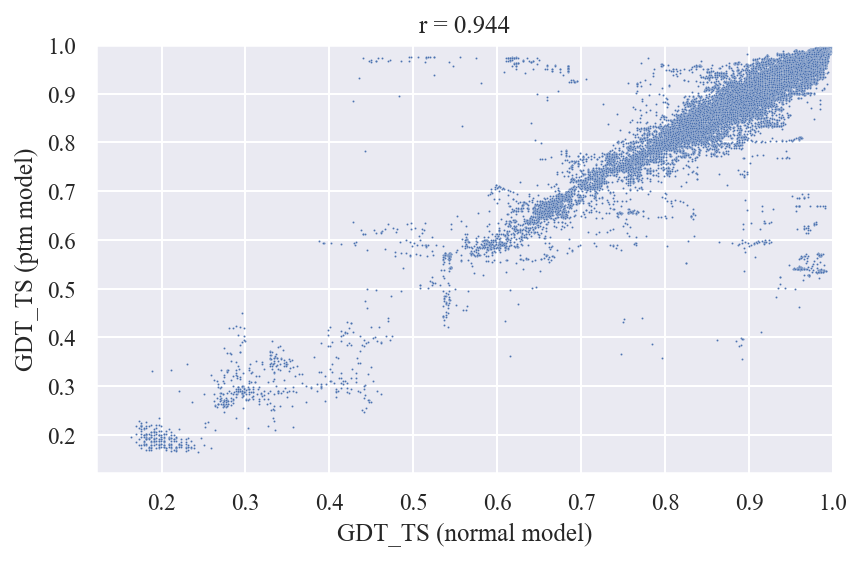

In [21]:
# Scatterplot of GDT_TS of models with and without ensemble
plt.figure(figsize=(6, 4))
label = 'GDT_TS'
sns.scatterplot(data=model_df, x=f'{label}_normal', y=f'{label}_ptm', s=1)
plt.xlabel(f'{label} (normal model)')
plt.ylabel(f'{label} (ptm model)')
cc = model_df.corr()[f'{label}_normal'][f'{label}_ptm']
plt.title(f'r = {cc:.3f}')
plt.xlim(None, 1)
plt.ylim(None, 1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_{label}_model_normal_ptm.png')

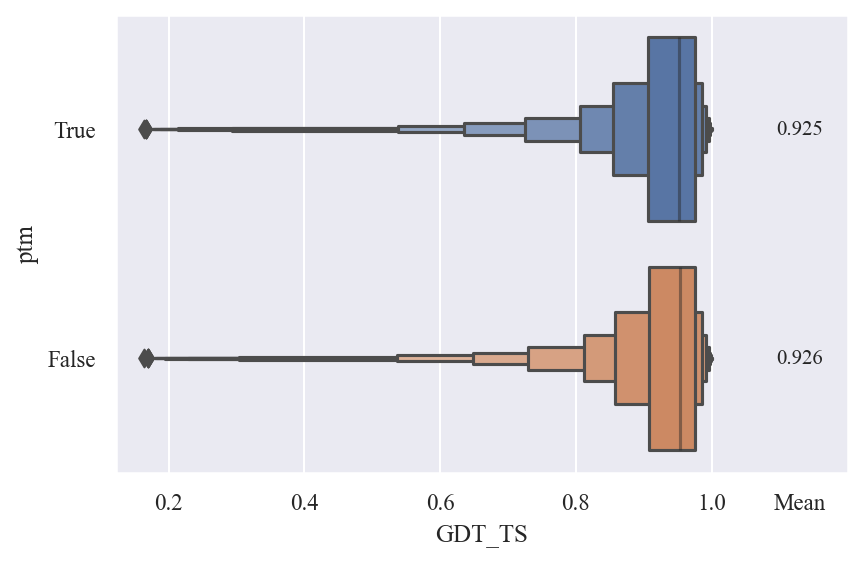

In [22]:
df['ptm'] = df['ptm'].astype(str)
sns.boxenplot(data=df, x='GDT_TS', y='ptm')
xticks_max = 1.13
plt.xlim(None, 1.2)
xticks = np.append(np.arange(0.2, 1.2, 0.2), [xticks_max])
xticks_str = list(map(lambda x: str(x)[:3], xticks))
xticks_str[-1] = 'Mean'
plt.xticks(xticks, xticks_str)
plt.axvline(x=xticks_max, color=(234/255,234/255,242/255))
mean_series = df.groupby('ptm').mean()['GDT_TS']
for i, p in enumerate(['True', 'False']):
    value = mean_series[p]
    plt.text(xticks_max, i, f'{value:.3f}', size=10, horizontalalignment='center', verticalalignment='center')
plt.tight_layout()
plt.savefig(fig_dir / f'boxen_{label}_normal_ptm_model.png')

In [23]:
# Wilcoxon signed-rank test between normal model and ptm model
data = model_df
x = f'{label}_normal'
y = f'{label}_ptm'
print(data[x].mean(), data[y].mean())
print(data[x].size, data[y].size)
print(stats.wilcoxon(data[x], data[y]))

0.926252446695096 0.924509685501066
93800 93800
WilcoxonResult(statistic=1520184630.5, pvalue=3.8547291070890226e-155)


## Difference between the maximum accuracy of normal model and ptm model

<AxesSubplot:xlabel='GDT_TS', ylabel='ptm'>

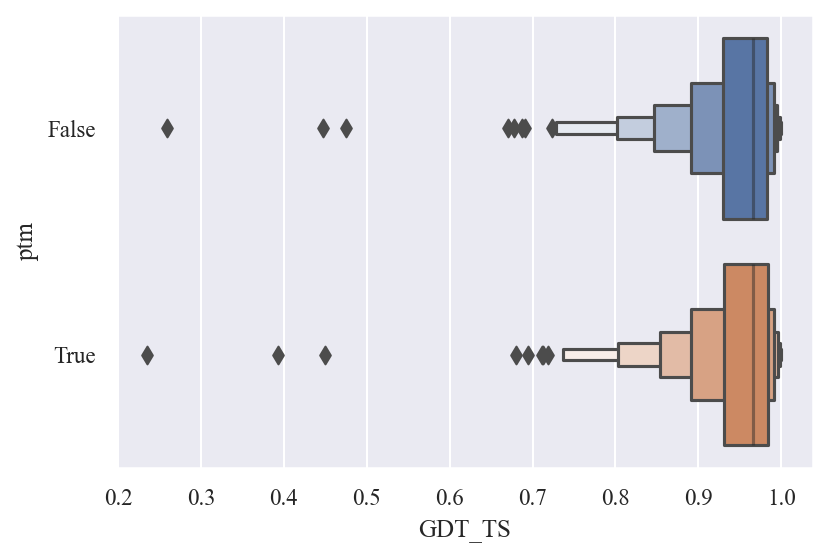

In [24]:
label = 'GDT_TS'
data = df.groupby(['Target', 'ptm']).max().reset_index()
sns.boxenplot(data=data, x=label, y='ptm')

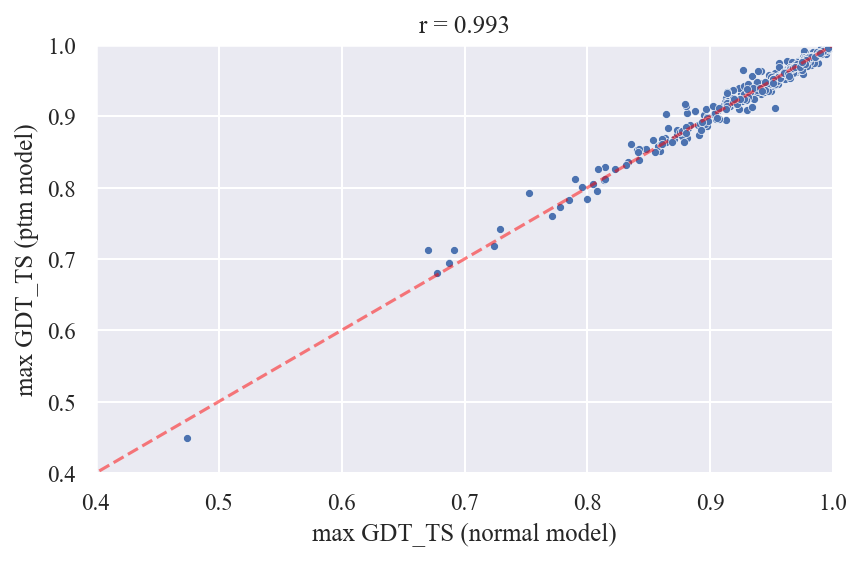

In [25]:
data = model_df.groupby('Target').max()
x_latent = np.linspace(0, 1, 100)
y_latent = x_latent
plt.plot(x_latent, y_latent, color='red', linestyle='--', alpha=0.5)
sns.scatterplot(data=data, x=f'{label}_normal', y=f'{label}_ptm', s=15)
plt.xlabel(f'max {label} (normal model)')
plt.ylabel(f'max {label} (ptm model)')
cc = data.corr()[f'{label}_normal'][f'{label}_ptm']
plt.title(f'r = {cc:.3f}')
plt.xlim(0.4, 1)
plt.ylim(0.4, 1)
plt.tight_layout()
plt.savefig(fig_dir / f'scatter_max_{label}_model_normal_ptm_each_target.png')